### Setup

In [1]:
import numpy as np
np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt

%run neural_network.ipynb
%run hyperparameters.ipynb

In [2]:
df = pd.read_csv("mnist.csv")

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


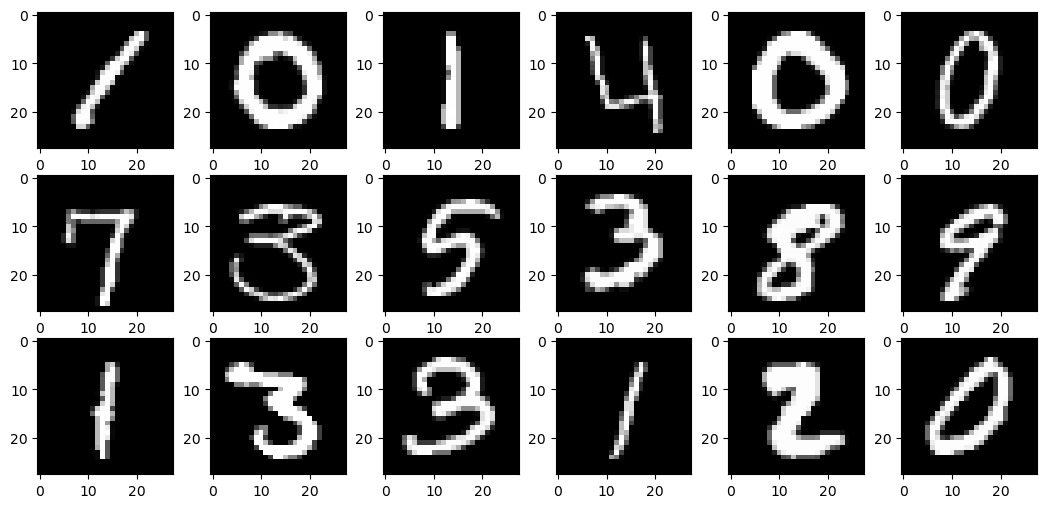

In [4]:
fig, axes = plt.subplots(3, 6, figsize=(13, 6))
for i in range(18):
    axes[i // 6, i % 6].imshow(df.drop('label', axis=1).iloc[i].values.reshape(28, 28), cmap='gray')

In [5]:
epsilon = 1e-8
m = df.shape[0]
X = np.array(df.drop('label', axis=1)).T
X = (X - np.mean(X, axis=1, keepdims=True)) / ((np.std(X, axis=1, keepdims=True)) + epsilon) # normalization
y = np.array(df['label'])
Y = np.zeros((10, m)).reshape(10, m)
for i in range(0, m):
    Y[y[i], i] = 1

In [6]:
test_size = int(m / 6)
X_train = X[:, :-test_size] # 784 x 35000
X_val = X[:, -test_size:]
y_train = y[:-test_size]
y_val = y[-test_size:]
Y_train = Y[:, :-test_size]
Y_val = Y[:, test_size:]

### Model

In [11]:
W, b, loss = neural_network(X_train, Y_train, L, n, epochs, batch_size, optimizer, alpha, beta1, beta2, lambd, dropout_prob)

Epoch 0: 2.763543685498898
Epoch 1: 1.9550698085293976
Epoch 2: 1.326792305659734
Epoch 3: 1.0779695993033416
Epoch 4: 0.8600425483067251
Epoch 5: 0.7811981639719434
Epoch 6: 0.6884239829995096
Epoch 7: 0.6389797409609306
Epoch 8: 0.6042290470645137
Epoch 9: 0.5694568238441733


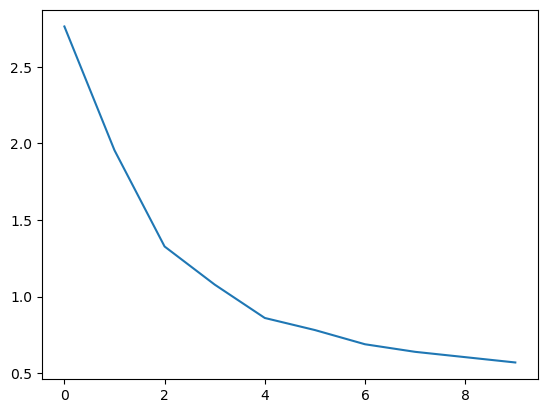

In [12]:
plt.plot(loss)

In [13]:
Z, A, D = variable_initialization(L, num_vars=3)
A[0] = X_train
Z, A = forward_prop(L, W, b, Z, A, D)

In [10]:
y_pred = np.argmax(A[3], 0)
accuracy = sum(y_pred == y_train) / (m - test_size)
accuracy

0.8419428571428571

### Results

In [11]:
Z, A, D = variable_initialization(L, num_vars=3)
A[0] = X_val
Z, A = forward_prop(L, W, b, Z, A, D)

In [12]:
y_pred = np.argmax(A[3], 0)
accuracy = sum(y_pred == y_val) / test_size
accuracy

0.8394285714285714